In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# impport data meat_muscle
df1=pd.read_csv('meat_muscle_growth.csv')
df1.head()

,ID,Gender,Age,Height,Weight,Frequency,Intensity,Protein,InitialMuscleMass,PostMuscleMass,MuscleChange,Diet,MuscleDecision
0,PT_14,F,30,164,51,3,Low,Beef,24.8,25.2,0.4,All Diet is TDEE+500,0
1,PT_25,F,22,155,55,6,Medium,Beef,24.8,25.2,0.4,All Diet is TDEE+500,0
2,PT_47,M,24,166,94,7,Low,Beef,40.8,41.3,0.5,All Diet is TDEE+500,1
3,PT_28,M,21,196,120,5,Medium,Beef,48.6,49.1,0.5,All Diet is TDEE+500,1
4,PT_11,M,25,170,93,6,Medium,Beef,44.6,45.2,0.6,All Diet is TDEE+500,1


In [3]:
# look at the data structure
df1.shape

(50, 13)

In [4]:
# find the data type and if there are missing values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
ID                   50 non-null object
Gender               50 non-null object
Age                  50 non-null int64
Height               50 non-null int64
Weight               50 non-null int64
Frequency            50 non-null int64
Intensity            50 non-null object
Protein              50 non-null object
InitialMuscleMass    50 non-null float64
PostMuscleMass       50 non-null float64
MuscleChange         50 non-null float64
Diet                 50 non-null object
MuscleDecision       50 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 5.2+ KB


In [5]:
# find the discriptive data
df1.describe()

,Age,Height,Weight,Frequency,InitialMuscleMass,PostMuscleMass,MuscleChange,MuscleDecision
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.160000,168.220000,70.120000,5.020000,32.572000,33.316000,0.744000,0.840000
std,2.895175,10.925144,20.628532,1.301334,8.813326,8.877542,0.285114,0.370328
min,20.000000,145.000000,38.000000,3.000000,20.000000,20.500000,0.100000,0.000000
25%,23.000000,160.250000,52.500000,4.000000,24.225000,25.050000,0.525000,1.000000
50%,25.000000,169.500000,69.500000,5.000000,35.650000,36.450000,0.800000,1.000000
75%,27.000000,176.000000,85.750000,6.000000,39.725000,40.750000,0.900000,1.000000
max,30.000000,196.000000,123.000000,7.000000,48.600000,49.100000,1.200000,1.000000


In [6]:
# find the range of data
df1_range=df1[["Age","Height","Weight","Frequency",\
               "InitialMuscleMass", "PostMuscleMass", "MuscleChange", 'MuscleDecision']].max()\
-df1[["Age","Height","Weight","Frequency",\
               "InitialMuscleMass", "PostMuscleMass", "MuscleChange",'MuscleDecision']].min()
print(df1_range)

Age                  10.0
Height               51.0
Weight               85.0
Frequency             4.0
InitialMuscleMass    28.6
PostMuscleMass       28.6
MuscleChange          1.1
MuscleDecision        1.0
dtype: float64


In [7]:
# data profiling
profile=profile = pandas_profiling.ProfileReport(df1)
display(profile)

Number of variables,13
Number of observations,50
Total Missing (%),0.0%
Total size in memory,5.2 KiB
Average record size in memory,105.6 B
Numeric,5
Categorical,3
Boolean,1
Date,0
Text (Unique),1
Rejected,3


In [8]:
# produce an report in html format
profile = pandas_profiling.ProfileReport(df1)
profile.to_file(outputfile="report.html")

In [9]:
# Adding found data (individual's health dataset)
df2=pd.read_csv('Individuals_Health.csv')
df2.head()

,ID,Gender,Age,hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,SmokingStatus
0,PT_1,M,24,0,0,No,Private,Urban,83.84,formerly smoked
1,PT_2,F,22,0,1,No,Self-employed,Rural,179.50,formerly smoked
2,PT_3,M,21,0,0,No,College Student,Rural,95.16,never smoked
3,PT_4,F,29,0,0,Yes,Private,Urban,94.76,never smoked
4,PT_5,M,30,0,0,Yes,Govt_job,Rural,83.57,never smoked


In [10]:
# look at the head after merging
df3=pd.merge(df1,df2)
df3.head()

,ID,Gender,Age,Height,Weight,Frequency,Intensity,Protein,InitialMuscleMass,PostMuscleMass,MuscleChange,Diet,MuscleDecision,hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,SmokingStatus
0,PT_14,F,30,164,51,3,Low,Beef,24.8,25.2,0.4,All Diet is TDEE+500,0,0,0,Yes,Private,Urban,83.05,never smoked
1,PT_25,F,22,155,55,6,Medium,Beef,24.8,25.2,0.4,All Diet is TDEE+500,0,0,0,No,Private,Rural,205.80,formerly smoked
2,PT_47,M,24,166,94,7,Low,Beef,40.8,41.3,0.5,All Diet is TDEE+500,1,0,0,Yes,Private,Urban,62.69,formerly smoked
3,PT_28,M,21,196,120,5,Medium,Beef,48.6,49.1,0.5,All Diet is TDEE+500,1,0,0,No,Private,Urban,94.80,never smoked
4,PT_11,M,25,170,93,6,Medium,Beef,44.6,45.2,0.6,All Diet is TDEE+500,1,0,0,No,Private,Rural,78.16,never smoked


In [11]:
# drop ID because it has nothing to do with the target value(just identification) and look at the data structure
df3.drop(["ID"], axis = 1, inplace = True)
df3.head()

,Gender,Age,Height,Weight,Frequency,Intensity,Protein,InitialMuscleMass,PostMuscleMass,MuscleChange,Diet,MuscleDecision,hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,SmokingStatus
0,F,30,164,51,3,Low,Beef,24.8,25.2,0.4,All Diet is TDEE+500,0,0,0,Yes,Private,Urban,83.05,never smoked
1,F,22,155,55,6,Medium,Beef,24.8,25.2,0.4,All Diet is TDEE+500,0,0,0,No,Private,Rural,205.80,formerly smoked
2,M,24,166,94,7,Low,Beef,40.8,41.3,0.5,All Diet is TDEE+500,1,0,0,Yes,Private,Urban,62.69,formerly smoked
3,M,21,196,120,5,Medium,Beef,48.6,49.1,0.5,All Diet is TDEE+500,1,0,0,No,Private,Urban,94.80,never smoked
4,M,25,170,93,6,Medium,Beef,44.6,45.2,0.6,All Diet is TDEE+500,1,0,0,No,Private,Rural,78.16,never smoked


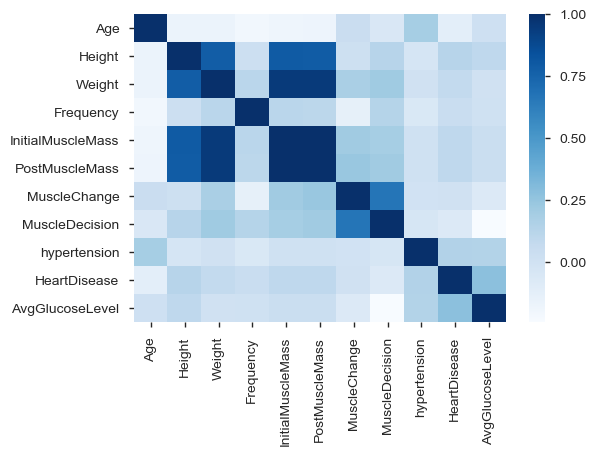

In [12]:
# Create Heat Map
plt.figure(figsize=(6,4))
sns.heatmap(df3.corr(),cmap='Blues',annot=False) 

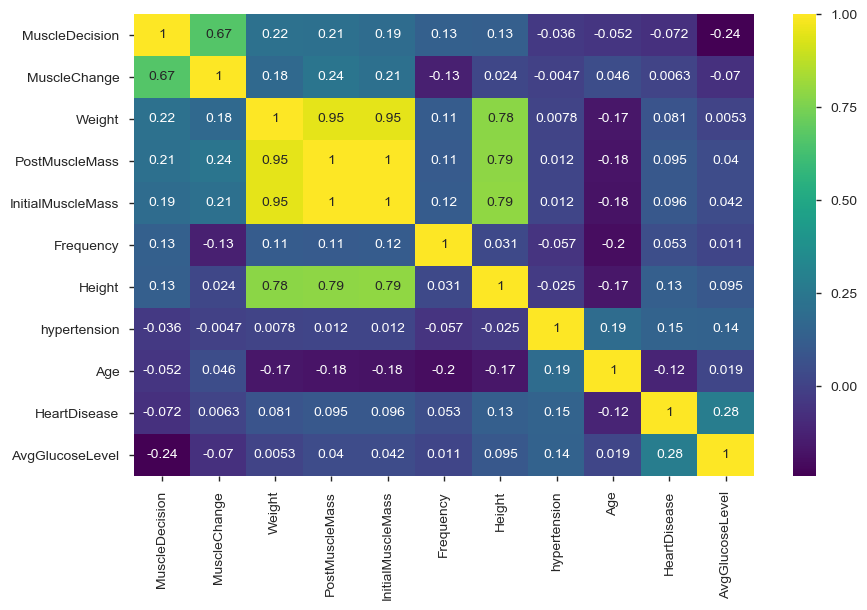

In [13]:
#Quality correlation matrix
k=12 #number of variables for heatmap
cols = df3.corr().nlargest(k,'MuscleDecision')['MuscleDecision'].index
cm = df3[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

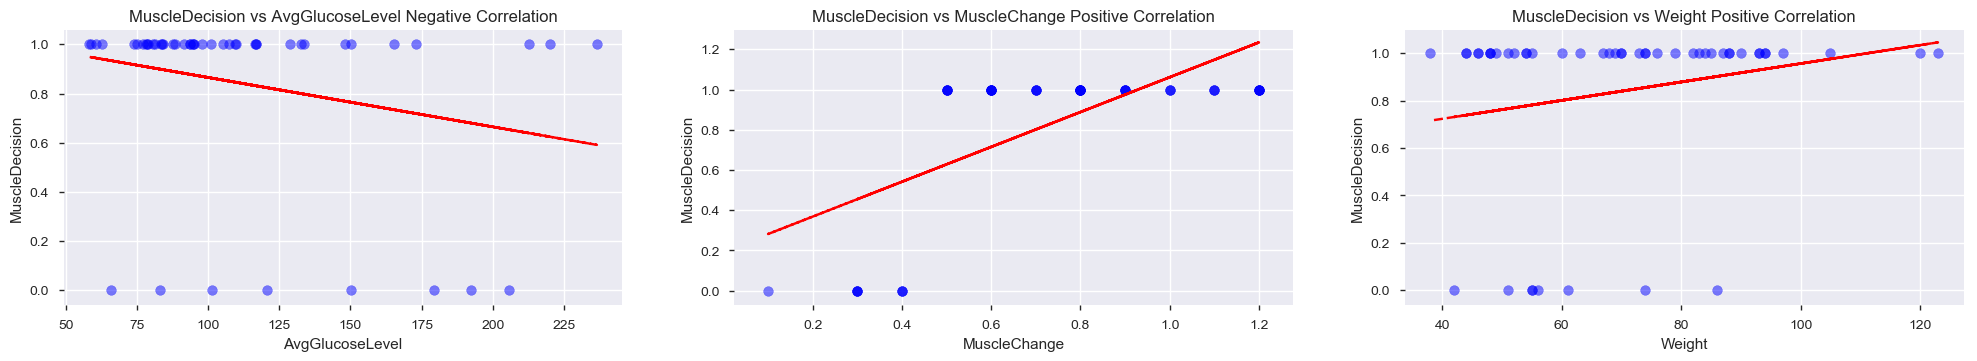

In [14]:
# Pearson Correlation
# Do Pearson Correlation between Decision with other variables that impact it (We do the ones >0.2 or <-0.2)
# We will only show weight because weight, InitialMuscleMass, and PostMuscleMassreally has a really strong correlation

# subplot 1
## show a negative correlation between Decision and AvgGlucoseLevel
plt.subplot(1, 3, 1)
plt.scatter(df3['AvgGlucoseLevel'], df3['MuscleDecision'], c='blue', alpha=0.5)
plt.title('MuscleDecision vs AvgGlucoseLevel Negative Correlation')
plt.xlabel('AvgGlucoseLevel')
plt.ylabel('MuscleDecision')
#calc the trendline
z = np.polyfit(df3['AvgGlucoseLevel'], df3['MuscleDecision'], 1)
p = np.poly1d(z)
plt.plot(df3['AvgGlucoseLevel'],p(df3['AvgGlucoseLevel']), "r--")


#subplot 2 
## show a positive correlation between Decision and MuscleChange
plt.subplot(1, 3, 2)
plt.scatter(df3['MuscleChange'], df3['MuscleDecision'], c='blue', alpha=0.5)
plt.title('MuscleDecision vs MuscleChange Positive Correlation')
plt.xlabel('MuscleChange')
plt.ylabel('MuscleDecision')
#calc the trendline
z = np.polyfit(df3['MuscleChange'], df3['MuscleDecision'], 1)
p = np.poly1d(z)
plt.plot(df3['MuscleChange'],p(df3['MuscleChange']), "r--")

#subplot 3
## show a positive correlation between Decision and Weight
plt.subplot(1, 3, 3)
plt.scatter(df3['Weight'], df3['MuscleDecision'], c='blue', alpha=0.5)
plt.title('MuscleDecision vs Weight Positive Correlation')
plt.xlabel('Weight')
plt.ylabel('MuscleDecision')
#calc the trendline
z = np.polyfit(df3['Weight'], df3['MuscleDecision'], 1)
p = np.poly1d(z)
plt.plot(df3['Weight'],p(df3['Weight']), "r--")

plt.subplots_adjust(bottom=0.25, right=2.50, top=0.75)
plt.show()

In [15]:
# From the correlation matrix, we see that Weight, PosMuscleMass, and InitialMuscleMass has really strong correlation(>0.95)
# With Collinearity, it will increase standard errors of the coefficient and by overinflating the standard error, makes some variables statistically insignificant when they should be significant
# Therefore, we only keep Weight and drop both PostMuscleMass and InitialMuscleMass 
df3.drop(["PostMuscleMass", "InitialMuscleMass"], axis = 1, inplace = True)
df3.head()

,Gender,Age,Height,Weight,Frequency,Intensity,Protein,MuscleChange,Diet,MuscleDecision,hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,SmokingStatus
0,F,30,164,51,3,Low,Beef,0.4,All Diet is TDEE+500,0,0,0,Yes,Private,Urban,83.05,never smoked
1,F,22,155,55,6,Medium,Beef,0.4,All Diet is TDEE+500,0,0,0,No,Private,Rural,205.80,formerly smoked
2,M,24,166,94,7,Low,Beef,0.5,All Diet is TDEE+500,1,0,0,Yes,Private,Urban,62.69,formerly smoked
3,M,21,196,120,5,Medium,Beef,0.5,All Diet is TDEE+500,1,0,0,No,Private,Urban,94.80,never smoked
4,M,25,170,93,6,Medium,Beef,0.6,All Diet is TDEE+500,1,0,0,No,Private,Rural,78.16,never smoked


In [16]:
# Feature engineer
# Binning numerical data (Weight, Height, AvgGlucoseLevel)
# We have large ranges of weight, height, and avg_glucose_level, so we bin these values 
# We don't bin the age since the age is between only 20-30 which in this age the metabolism system doesn't have huge difference
df3['Weight']=pd.qcut(df3.Weight, q=4, labels=False)
df3['Height']=pd.qcut(df3.Height, q=4, labels=False)
df3['AvgGlucoseLevel']=pd.qcut(df3.AvgGlucoseLevel, q=4, labels=False)
df3.head()

,Gender,Age,Height,Weight,Frequency,Intensity,Protein,MuscleChange,Diet,MuscleDecision,hypertension,HeartDisease,EverMarried,WorkType,ResidenceType,AvgGlucoseLevel,SmokingStatus
0,F,30,1,0,3,Low,Beef,0.4,All Diet is TDEE+500,0,0,0,Yes,Private,Urban,1,never smoked
1,F,22,0,1,6,Medium,Beef,0.4,All Diet is TDEE+500,0,0,0,No,Private,Rural,3,formerly smoked
2,M,24,1,3,7,Low,Beef,0.5,All Diet is TDEE+500,1,0,0,Yes,Private,Urban,0,formerly smoked
3,M,21,3,3,5,Medium,Beef,0.5,All Diet is TDEE+500,1,0,0,No,Private,Urban,1,never smoked
4,M,25,2,3,6,Medium,Beef,0.6,All Diet is TDEE+500,1,0,0,No,Private,Rural,0,never smoked


In [17]:
# Export dataframe after binning by saving it as a csv file
df3.to_csv('bin.csv', index=False)

In [18]:
# Feature engineer
# Transforming object variables into numeric variables with dummy variables by One-hot encoding schemes 
df3_dum=pd.get_dummies(df3, drop_first="True")
df3_dum.head()

,Age,Height,Weight,Frequency,MuscleChange,MuscleDecision,hypertension,HeartDisease,AvgGlucoseLevel,Gender_M,...,Intensity_Medium,Protein_Chicken,Protein_Pork,EverMarried_Yes,WorkType_Govt_job,WorkType_Private,WorkType_Self-employed,ResidenceType_Urban,SmokingStatus_never smoked,SmokingStatus_smokes
0,30,1,0,3,0.4,0,0,0,1,0,...,0,0,0,1,0,1,0,1,1,0
1,22,0,1,6,0.4,0,0,0,3,0,...,1,0,0,0,0,1,0,0,0,0
2,24,1,3,7,0.5,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,0
3,21,3,3,5,0.5,1,0,0,1,1,...,1,0,0,0,0,1,0,1,1,0
4,25,2,3,6,0.6,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


In [19]:
# Export dataframe after changing categorical variables to number by saving it as a csv file
df3_dum.to_csv('dummy_variable.csv', index=False)